In [1]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pd.read_csv("reviews.csv", parse_dates = ['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


In [2]:
data['Date'] = data['Timestamp'].dt.date
data.head()

,Course Name,Timestamp,Rating,Comment,Date
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02


## Daily average of all courses

In [3]:
day_average = data.groupby(['Date']).count()
day_average.head()

,Course Name,Timestamp,Rating,Comment
Date,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


In [4]:
day_average = data.groupby(['Date']).mean()
day_average

,Rating
Date,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


In [5]:
day_average.columns

Index(['Rating'], dtype='object')

In [6]:
day_average.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Date', length=1188)

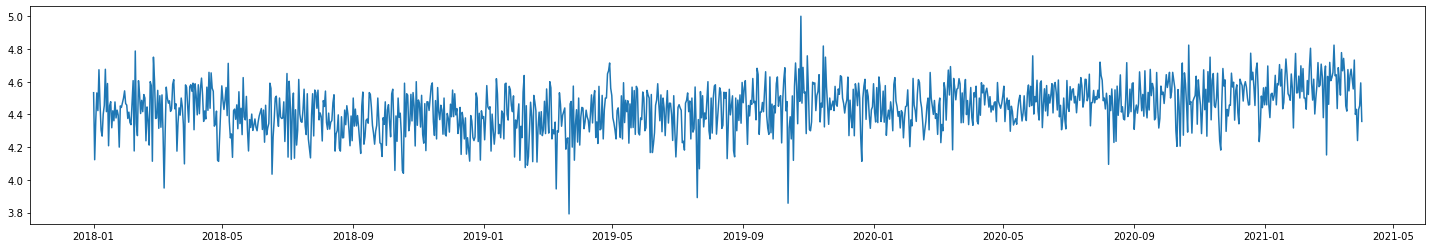

In [7]:
plt.figure(figsize=(25, 4))
plt.plot(day_average.index, day_average['Rating'])

## Weekly average of all courses

In [8]:
#data['Week'] = data['Timestamp'].dt.week
#data['Week'] = data['Timestamp'].dt.isocalendar().week
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

In [9]:
data.head()

,Course Name,Timestamp,Rating,Comment,Date,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13


In [10]:
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


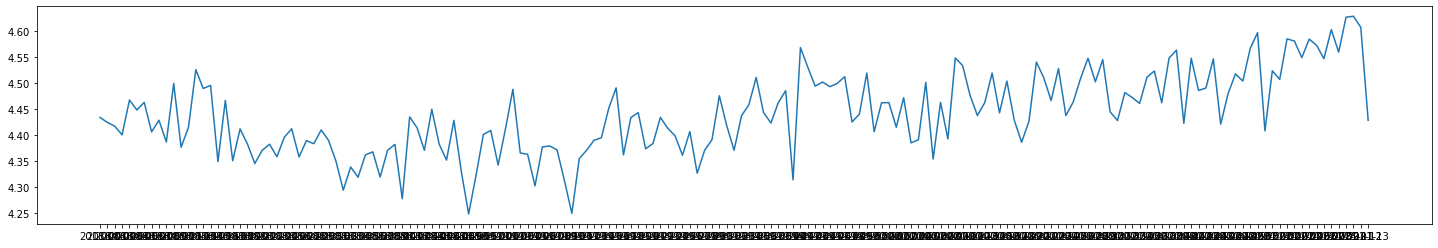

In [11]:
plt.figure(figsize=(25, 4))
plt.plot(week_average.index, week_average['Rating'])

## Monthly average of all courses

In [12]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
data['Month']

0        2021-04
1        2021-04
2        2021-04
3        2021-04
4        2021-04
          ...   
44995    2018-01
44996    2018-01
44997    2018-01
44998    2018-01
44999    2018-01
Name: Month, Length: 45000, dtype: object

In [13]:
month_average = data.groupby(['Month']).mean()
month_average

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420
2018-06,4.375379
2018-07,4.393184
2018-08,4.344753
2018-09,4.347247


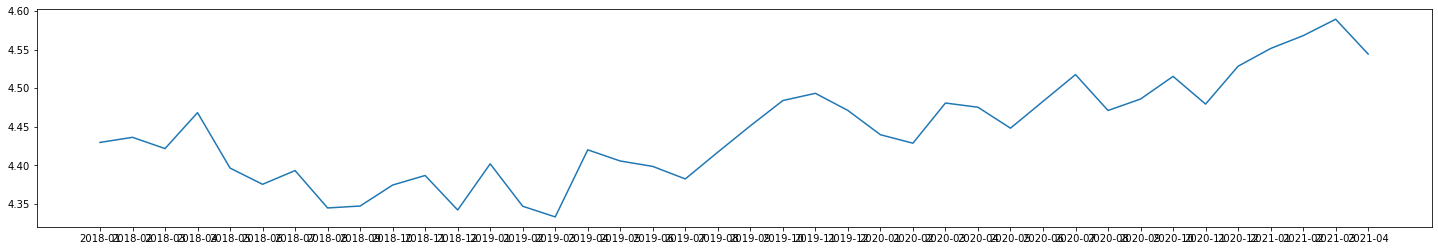

In [14]:
plt.figure(figsize=(25, 4))
plt.plot(month_average.index, month_average['Rating'])

## Average rating of courses by month

In [15]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_by_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_by_crs[:20]

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
        The Python Mega Course: Build 10 Real World App...  4.457368
2018-02 100 Python Exercises I: Evaluate and Improve Yo...  4.250000
        Data Processing with Python                         4.205882
        Interactive Data Visualization with Python and ...  4.157895
        Learn GIS in One Hour                               4.437500
        Python for Beginners with Examples                  4.363095
        The Python Mega Course: Build 10 Real World App...  4.481070
2018-03 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Data Processing with Python                         4.281250
        Interactive Data Visualization with Python and ...  4.266667
        Learn GIS in One Hour                               4.166667
        Python for Beginners with Examples                  4.357143
        The Python Mega Course: Build 10 Real World App...  4.447037
2018-04 100 Python Exercises I: Evaluate and Improve Yo...  4.431034
        Data Processing with Python                         4.468750

In [16]:
month_average_by_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_by_crs[-20:]

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2019-09                                               4.631579          
2019-10                                               4.000000          
2019-11                                               4.571429          
2019-12                                               4.625000          
2020-01                                               4.409091          
2020-02                                               4.000000          
2020-03                                               4.562500          
2020-04                                               4.538462          
2020-05                                               4.568182          
2020-06                                               4.500000          
2020-07                                               4.214286          
2020-08                                               4.625000          
2020-09                                               4.576923          
2020-10                                               4.500000          
2020-11                                               4.687500          
2020-12                                               4.937500          
2021-01                                               4.700000          
2021-02                                               4.562500          
2021-03                                               4.750000          
2021-04                                                    NaN          

                                         \
Course Name Data Processing with Python   
Month                                     
2019-09                        4.291667   
2019-10                        4.260000   
2019-11                        4.361111   
2019-12                        4.104167   
2020-01                        4.068966   
2020-02                        4.296875   
2020-03                        4.397059   
2020-04                        4.078431   
2020-05                        4.016949   
2020-06                        4.178571   
2020-07                        4.386364   
2020-08                        4.578947   
2020-09                        4.404762   
2020-10                        4.6000

<AxesSubplot:xlabel='Month'>

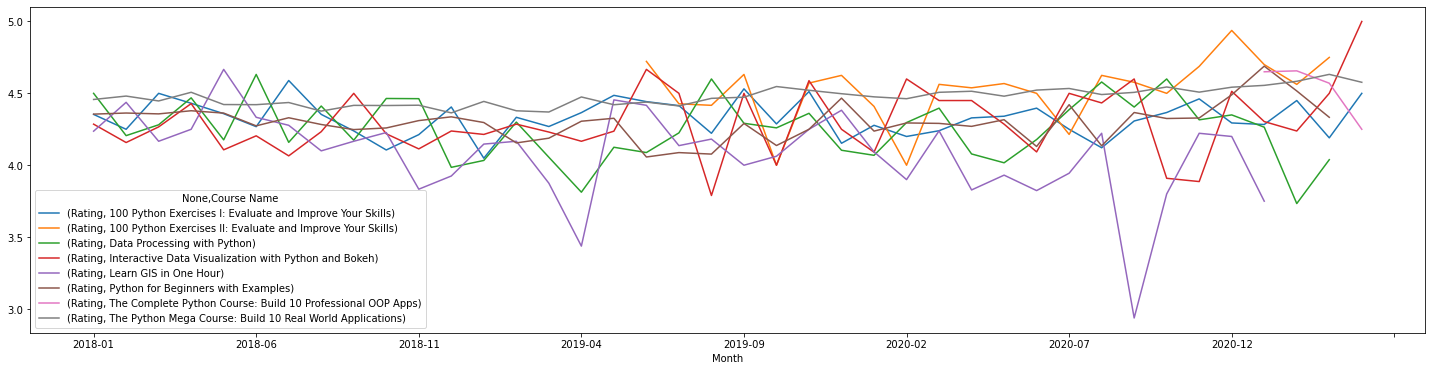

In [17]:
month_average_by_crs.plot(figsize=(25,6))

<AxesSubplot:xlabel='Month'>

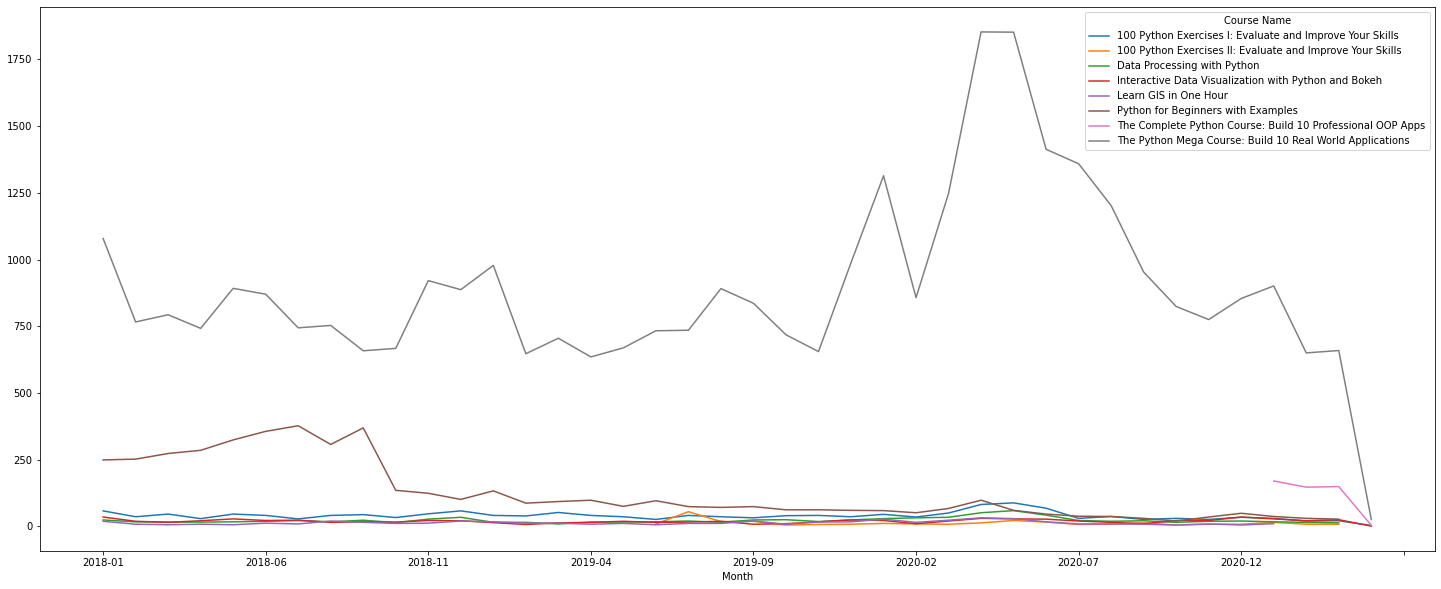

In [18]:
month_average_by_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()
month_average_by_crs.plot(figsize=(25,10))

## Average rating of course on weekday basis

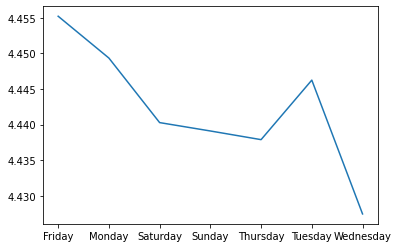

In [19]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday']).mean()
weekday_average = weekday_average.sort_values('Weekday')

plt.plot(weekday_average.index, weekday_average['Rating'])

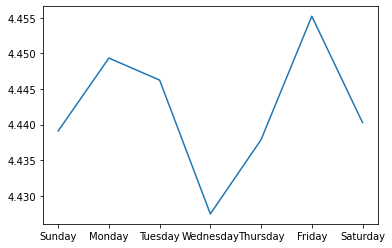

In [20]:
weekday_average = data.groupby(['Weekday','Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

#Index returns tuple
x_values = weekday_average.index.get_level_values(0)

plt.plot(x_values, weekday_average['Rating'])

<BarContainer object of 7 artists>

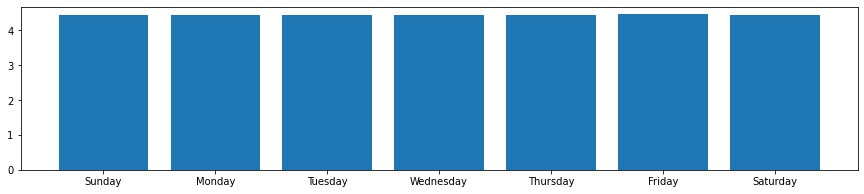

In [21]:
plt.figure(figsize=[15,3])
plt.bar(x_values, weekday_average['Rating'])

### Number of ratings by course

In [22]:
coursert = data.groupby(['Course Name']).count()
coursert

,Timestamp,Rating,Comment,Date,Week,Month,Weekday,Daynumber
Course Name,,,,,,,,
100 Python Exercises I: Evaluate and Improve Your Skills,1593,1593,231,1593,1593,1593,1593,1593
100 Python Exercises II: Evaluate and Improve Your Skills,280,280,81,280,280,280,280,280
Data Processing with Python,868,868,117,868,868,868,868,868
Interactive Data Visualization with Python and Bokeh,767,767,118,767,767,767,767,767
Learn GIS in One Hour,499,499,119,499,499,499,499,499
Python for Beginners with Examples,4821,4821,764,4821,4821,4821,4821,4821
The Complete Python Course: Build 10 Professional OOP Apps,470,470,91,470,470,470,470,470
The Python Mega Course: Build 10 Real World Applications,35702,35702,5278,35702,35702,35702,35702,35702


In [23]:
coursert = data.groupby(['Course Name'])['Rating'].count()
coursert

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x19407a27940>,
 [Text(1.0932045021416132, 0.12208159770132226, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(1.0679539537181753, 0.26357987923534204, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(1.0434237552357248, 0.34823392570193146, 'Data Processing with Python'),
  Text(0.9969710234481678, 0.46481047579063145, 'Interactive Data Visualization with Python and Bokeh'),
  Text(0.9520514707070057, 0.5509972750609822, 'Learn GIS in One Hour'),
  Text(0.6871674297354247, 0.858953388438983, 'Python for Beginners with Examples'),
  Text(0.3307031314068022, 1.0491117380325774, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-0.8762757995015485, -0.6649366309716455, 'The Python Mega Course: Build 10 Real World Applications')])

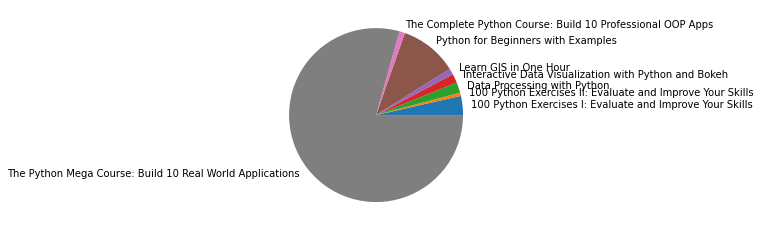

In [24]:
plt.pie(coursert, labels = coursert.index)